In [1]:
import pandas as pd
import numpy as np
import billboard
import datetime as datetime
import random
import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
%matplotlib inline

In [2]:
%run all_code_more_lags.py

In [212]:
df = pd.read_csv('data_safe/df_at_for_models_714.csv').drop('Unnamed: 0', axis=1)

In [213]:
df['lag_3'] = df['position'].shift(3)
df['lag_4'] = df['position'].shift(4)
df['lag_5'] = df['position'].shift(5)

df.fillna(51, inplace=True)

df['delta_3'] = df['lag_3'] - df['lag_2']
df['delta_4'] = df['lag_4'] - df['lag_3']
df['delta_5'] = df['lag_5'] - df['lag_4']

In [167]:
df[df.artist == 'Chic']

,artist,chart_date,debut,delta_1,delta_2,key,lag_1,lag_2,move,move_2,...,weeks_on_chart,year,weeks_lag,peak_lag,lag_3,lag_4,lag_5,delta_3,delta_4,delta_5
8513,Chic,1978-01-07,1978-01-07,-6.0,0.0,Chic - Chic,51,51,1.0,down,...,0,1978,0.0,51.0,39.0,28.0,28.0,-12.0,-11.0,0.0
8514,Chic,1978-01-14,1978-01-07,-7.0,-6.0,Chic - Chic,45,51,1.0,down,...,1,1978,0.0,51.0,44.0,39.0,28.0,-7.0,-5.0,-11.0
8515,Chic,1978-01-21,1978-01-07,-8.0,-7.0,Chic - Chic,38,45,1.0,down,...,2,1978,0.0,51.0,50.0,44.0,39.0,5.0,-6.0,-5.0
8516,Chic,1978-01-28,1978-01-07,-11.0,-8.0,Chic - Chic,30,38,1.0,down,...,3,1978,0.0,51.0,45.0,50.0,44.0,7.0,5.0,-6.0
8517,Chic,1978-02-04,1978-01-07,-5.0,-11.0,Chic - Chic,19,30,1.0,down,...,4,1978,0.0,51.0,38.0,45.0,50.0,8.0,7.0,5.0
8518,Chic,1978-02-11,1978-01-07,-2.0,-5.0,Chic - Chic,14,19,0.0,stay,...,5,1978,0.0,51.0,30.0,38.0,45.0,11.0,8.0,7.0
8519,Chic,1978-02-18,1978-01-07,0.0,-2.0,Chic - Chic,12,14,1.0,up,...,6,1978,0.0,51.0,19.0,30.0,38.0,5.0,11.0,8.0
8520,Chic,1978-02-25,1978-01-07,7.0,0.0,Chic - Chic,12,12,0.0,stay,...,7,1978,0.0,51.0,14.0,19.0,30.0,2.0,5.0,11.0
8521,Chic,1978-03-04,1978-01-07,0.0,7.0,Chic - Chic,19,12,1.0,down,...,8,1978,0.0,51.0,12.0,14.0,19.0,0.0,2.0,5.0
8522,Chic,1978-03-11,1978-01-07,-3.0,0.0,Chic - Chic,19,19,1.0,up,...,9,1978,0.0,51.0,12.0,12.0,14.0,-7.0,0.0,2.0


In [106]:
df.columns

Index(['artist', 'chart_date', 'debut', 'delta_1', 'delta_2', 'key', 'lag_1',
       'lag_2', 'move', 'move_2', 'move_2n', 'next_delta', 'next_pos', 'peak',
       'position', 'title', 'total_weeks', 'weeks_on_chart', 'year',
       'weeks_lag', 'peak_lag', 'lag_3', 'lag_4', 'lag_5', 'delta_3',
       'delta_4', 'delta_5'],
      dtype='object')

In [22]:
data = df.set_index('key')
feats = ['position','delta_1', 'delta_2', 'delta_3', 'delta_4', 'delta_5', 'weeks_on_chart', 'peak_lag', 'weeks_lag']

drop_cols = [c for c in data.columns if c not in feats]

target = 'move_2n'

X = data.drop(drop_cols, axis=1)
y = data.loc[:, target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
X_train.shape

(21504, 9)

In [24]:
X_test.shape

(7169, 9)

In [27]:
df.key.unique()

(2020,)

In [86]:
# create key list
d1 = df.key.unique()

# set features and target
feats = ['position','delta_1', 'delta_2', 'delta_3', 'delta_4', 'delta_5', 'weeks_on_chart', 'peak_lag', 'weeks_lag']
target = 'move_2n'

# shuffle unique keys
random.shuffle(d1)

# define split percentage
l = int(len(d1)*0.3)

# subset train and test
test = d1[:l]
train = d1[l:]

df_train = df[df['key'].isin(train)]
df_test = df[df['key'].isin(test)]

X_train = df_train[feats]
y_train = df_train[target]
X_test = df_test[feats]
y_test = df_test[target]

In [270]:
# chart date and artist added
def proboy(X_tr, y_tr, X_te, y_te, model, data):
    model.fit(X_tr, y_tr)
    preds = model.predict_proba(X_te)
    outs = pd.concat([X_te, y_te], axis=1)
    outs['down_proba'] = preds[:,0]
    outs['stay_proba'] = preds[:,1]
    outs['up_proba'] = preds[:,2]
    outs  = pd.merge(outs, data[['key','artist','chart_date']],
                     how='inner', left_index=True, right_index=True)
    return outs

In [104]:
# using Pipeline for scaling
px = Pipeline ([
        ('ss', StandardScaler()),
        ('clf', XGBClassifier())
        
])

pr = Pipeline ([
        ('ss', StandardScaler()),
        ('clf', RandomForestClassifier())
        
])

pk = Pipeline ([
        ('ss', StandardScaler()),
        ('clf', KNeighborsClassifier())
        
])

ps = Pipeline ([
        ('ss', StandardScaler()),
        ('clf', SGDClassifier(loss='modified_huber'))
        
])

In [271]:
# save predict proba results
xg_outs = proboy(X_train, y_train, X_test, y_test, px, df)
rf_outs = proboy(X_train, y_train, X_test, y_test, pr, df)
knn_outs = proboy(X_train, y_train, X_test, y_test, pk, df)
sgd_outs = proboy(X_train, y_train, X_test, y_test, ps, df)

testing tts fidelity

In [185]:
def plot_key(key, data):
    df = data[data['key'] == key].sort_values('chart_date')
    
#     fig = plt.figure(figsize=(8,8))
    plt.title(s=key)
    ax = plt.plot_date(data=df, x='chart_date', y='position', xdate=True, fmt='o-r')
    plt.xticks(rotation=90)
    return
    
def pk_comp(key, d_1, d_2):
#     if key in test:
#         d2 = df_test
#     elif key in train:
#         d2 = df_train
#     else:
#         print('not found')
#         return
    
    fig = plt.figure(figsize=(14,7))
    plt.subplot(1, 2, 1)
    plot_key(key, d_1)
    plt.subplot(1, 2, 2)
    plot_key(key, d_2)
    return



In [163]:
'Ohio Players - Everybody Up' in train

True

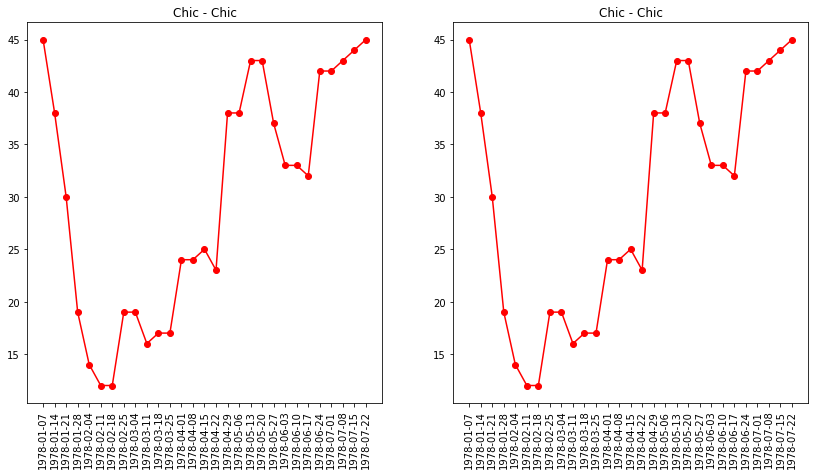

In [168]:
pk_comp('Chic - Chic', df)

yeah looks like this works

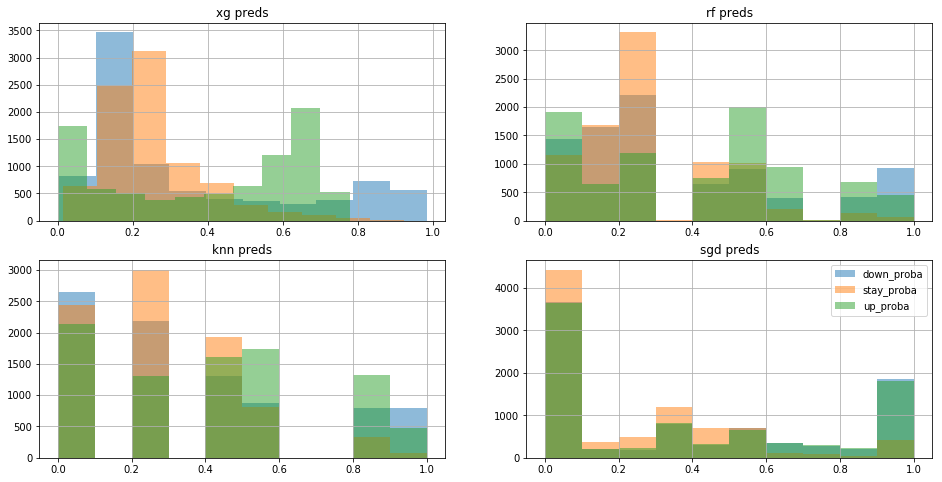

In [170]:
# hists of xgb predict proba and svc predict proba for test
fig = plt.figure(figsize=(16,8))
ms = ['xg', 'rf', 'knn', 'sgd']
a = 0.5
b = 10
dz = False
for o in ms:
    plt.subplot(2,2,ms.index(o)+1)
    d = eval(f'{o}_outs')
    plt.title(s=f'{o} preds')
    d.down_proba.hist(bins=b, density=dz, alpha=a)
    d.stay_proba.hist(bins=b, density=dz, alpha=a)
    d.up_proba.hist(bins=b, density=dz, alpha=a)
    # plt.xlim(0,1) 
    
plt.legend(['down_proba', 'stay_proba', 'up_proba']);

In [248]:
xg_outs[xg_outs['weeks_on_chart'] > 20].sort_values('weeks_on_chart', ascending=True).reset_index()

,index,position,delta_1,delta_2,delta_3,delta_4,delta_5,weeks_on_chart,peak_lag,weeks_lag,move_2n,down_proba,stay_proba,up_proba,key,chart_date
0,8789,33,1.0,4.0,-13.0,-4.0,-1.0,21,1.0,23.0,1.0,0.082199,0.163925,0.753876,Rufus And Chaka Khan - Street Player,1978-07-15
1,24608,29,2.0,0.0,-2.0,1.0,-9.0,21,24.0,31.0,1.0,0.140475,0.237803,0.621722,Culture Club - Colour By Numbers,1984-07-14
2,24507,39,-1.0,3.0,-4.0,-4.0,0.0,21,1.0,33.0,1.0,0.196418,0.220253,0.583329,"Evelyn ""Champagne"" King - Face To Face",1984-06-09
3,8496,6,-1.0,0.0,0.0,0.0,-5.0,21,40.0,6.0,1.0,0.235414,0.481393,0.283193,Soundtrack - Saturday Night Fever,1978-06-03
4,24241,13,-1.0,-2.0,1.0,0.0,-2.0,21,5.0,24.0,0.0,0.331505,0.352400,0.316095,Kool & The Gang - In The Heart,1984-05-05
5,24121,30,8.0,3.0,0.0,1.0,2.0,21,26.0,8.0,1.0,0.128826,0.223299,0.647875,Eddie Murphy - Eddie Murphy: Comedian,1984-04-21
6,23971,36,-2.0,4.0,-4.0,1.0,-1.0,21,9.0,35.0,1.0,0.301557,0.286308,0.412135,ConFunkShun - Fever,1984-04-21
7,8534,33,-4.0,-6.0,0.0,-5.0,0.0,21,51.0,0.0,0.0,0.556206,0.269996,0.173798,Chic - Chic,1978-06-03
8,23814,28,7.0,-1.0,-3.0,0.0,0.0,21,2.0,25.0,1.0,0.143905,0.267601,0.588494,Teena Marie - Robbery,1984-04-07
9,8696,20,5.0,5.0,0.0,-3.0,-2.0,21,43.0,3.0,0.0,0.104103,0.254713,0.641184,George Benson - Weekend In L.a.,1978-07-08


In [198]:
key = 'Teena Marie - Irons In The Fire'

In [199]:
xg_outs[xg_outs.key == key].shape

(27, 15)

In [200]:
df[df.key == key].shape

(27, 27)

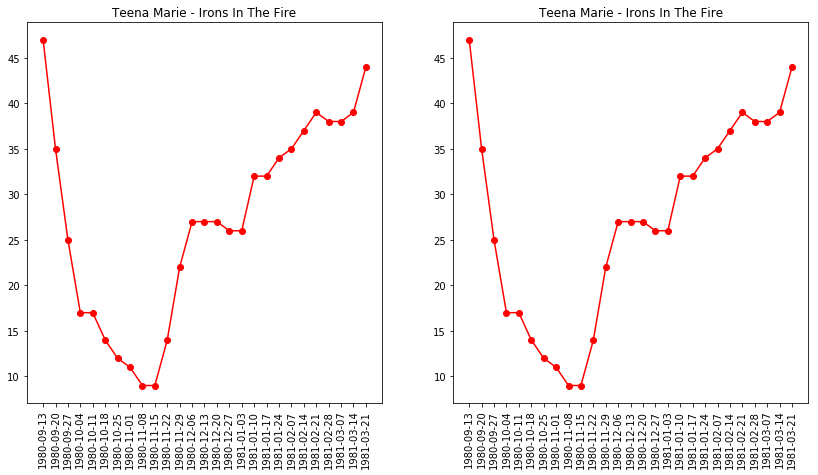

In [201]:
pk_comp(key, xg_outs, df)

In [300]:
def chart_proba(key, data, fig=True, legend=True):
    d1 = data[data['key'] == key].sort_values('chart_date').reset_index()
    if fig:
        fig = plt.figure(figsize=(17,10))
    plt.title(s=key)
    z_inc = 0.3
    z = 0-z_inc
    for p in ['down_proba', 'stay_proba', 'up_proba']:
        plt.bar(data=d1, x=d1['index']+z, height=d1[p]*100, alpha=0.4, width=z_inc)
        z += z_inc
    plt.scatter(data=d1, x='index', y='position')
    if legend:
        plt.legend(['chart position','down_proba', 'stay_proba', 'up_proba'])
    plt.xticks([]);
    return

In [298]:
def artist_charts_proba(artist, data):
    keys = data[data['artist'] == artist]['key'].unique()
    l = len(keys)
    rows = 1
    cols = l
    if l > 3:
        rows = 2
        cols = 3
    p = 1
    fig = plt.figure(figsize=(17,10))
    for k in keys:
        plt.subplot(rows, cols, p)
        chart_proba(k, data, fig=False, legend=False)
        p += 1
    return
        

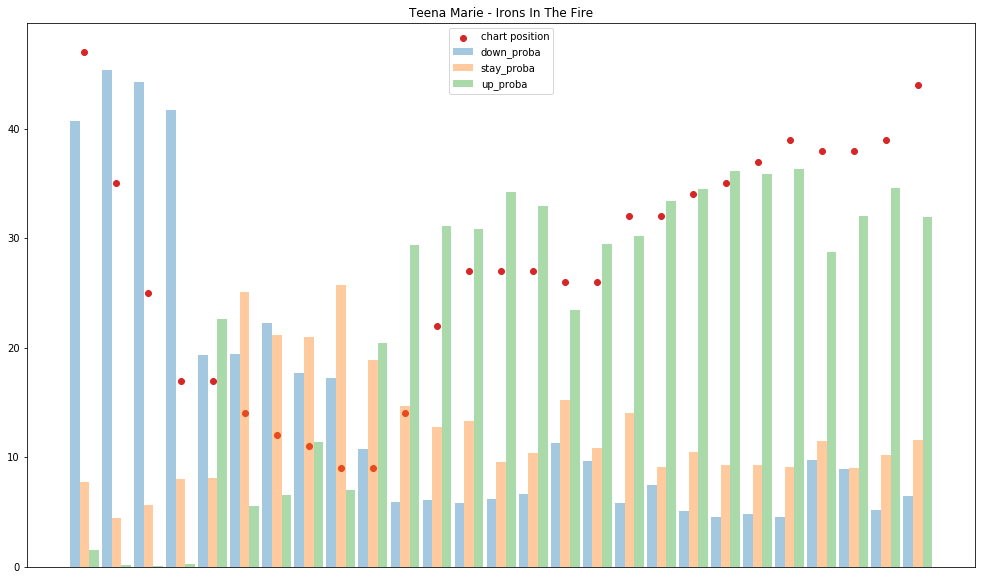

In [287]:
chart_proba(key, xg_outs)

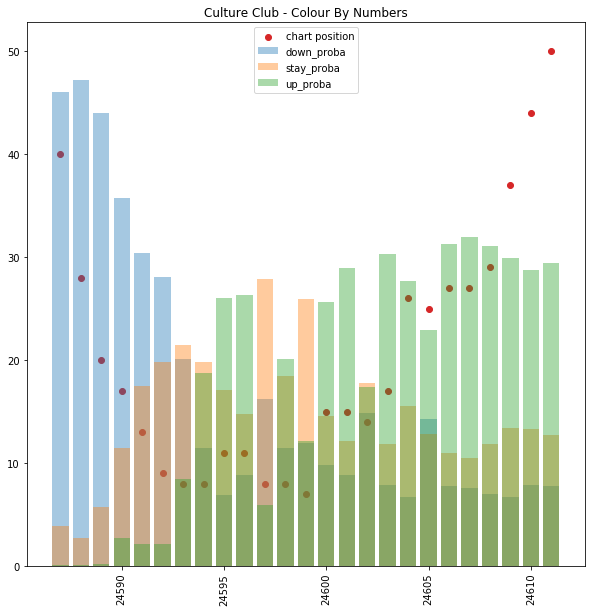

In [249]:
chart_proba('Culture Club - Colour By Numbers', xg_outs)

In [254]:
d1 = data[data['key'] == key].sort_values('chart_date').reset_index()

In [279]:
xg_outs[['artist','key']].drop_duplicates().groupby('artist').count().sort_values('key', ascending=False)

,key
artist,
Soundtrack,12
Aretha Franklin,5
Spyro Gyra,5
Patti LaBelle,5
Bill Withers,5
Diana Ross,5
Millie Jackson,5
The Manhattans,5
Slave,4


In [282]:
xg_outs[xg_outs['artist'] == 'Spyro Gyra']['key'].unique()

array(['Spyro Gyra - Morning Dance', 'Spyro Gyra - Catching The Sun',
       'Spyro Gyra - Carnaval', 'Spyro Gyra - Freetime',
       'Spyro Gyra - Alternating Currents'], dtype=object)

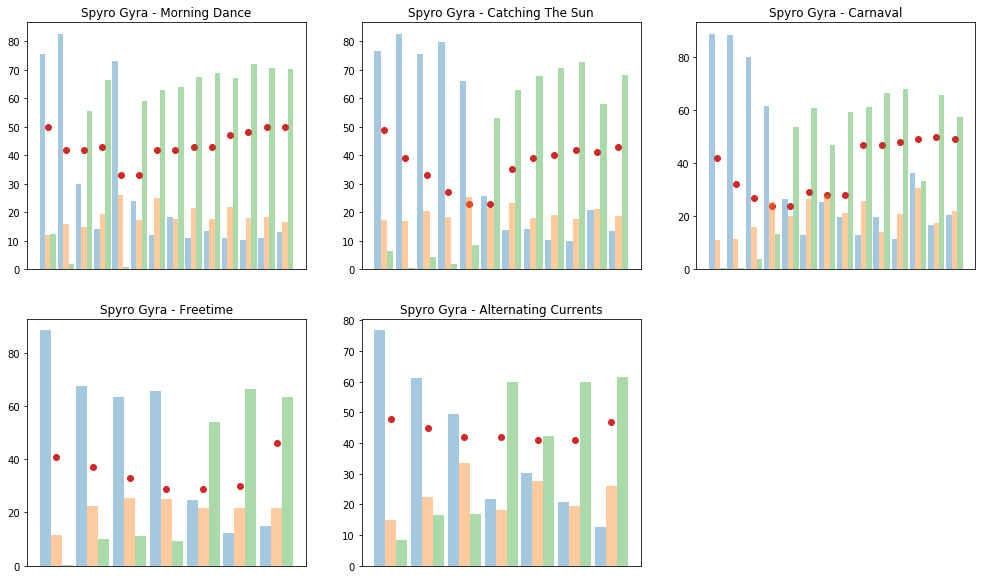

In [301]:
artist_charts_proba('Spyro Gyra', xg_outs)